# Numerical experiment draft
## Linear regression case, with identity covariance matrix

In [1]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t

In [2]:
# Generate data here

# set random seed
rng = np.random.default_rng(1)

# basic setting
var_epsilon = 1 # variance for noise in linear regression
d = 1 # d = 5,20,100,200
n = int(1e4) # sample size
eta = 1e0
alpha = 0.501 # step size eta_i = eta * i^{-alpha}
x_star = np.linspace(0,1,d) # optimal solution
x_0 = np.zeros(d) # initial guess

# mean and variance for generating a_i
# identity covariance matrix case
#
# linear regression model:
# b_i = x_star^\top a_i + \epsilon_i
mean_a = np.zeros(d)
cov_a = np.eye(d)
Asy_cov = np.eye(d) # asymptotic covariance matrix

In [3]:
# F for linear regression
#   F(x) = \mathbb{E} [1/2 (a^T x - b)^2]
#        = 1/2 (x-x_star)@cov_a@(x-x_star) + var_epsilon
def F_LR(x, cov_a, x_star, var_epsilon):
    return .5 * (x-x_star) @ cov_a @ (x-x_star) + var_epsilon


In [4]:
# run sgd
#
# update rule:
#   a_n: normal distribution (mean_a, cov_a)
#   epsilon_n: normal distribution (0,sigma_epsilon)
#   b_n = a_n^T x_star + epilon_n (assume it is generated instead of computing from a_n and x_star)
#   x_n = x_{n-1} - \eta_n a_n (a_n^T x_{n-1} - b_n)

x_prev = x_0
x_history = []
x_bar_history = []
a_n_history = []
b_n_history = []
F_true = var_epsilon
F_x_history = []
F_x_bar_history = []
lr_history = []

for iter_num in range(n):
    # sample data
    a_n = rng.multivariate_normal(mean_a, cov_a)
    epsilon_n = rng.normal(0, var_epsilon)
    b_n = a_n @ x_star + epsilon_n
    # update learning rate
    eta_n = eta * (1+iter_num)**(-alpha)
    # update rule
    x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
    x_prev = x_n
    # recording
    x_history.append(x_n)
    x_bar_history.append(np.mean(x_history, axis=0))
    a_n_history.append(a_n)
    b_n_history.append(b_n)
    F_x_history.append(F_LR(x_n, cov_a, x_star, var_epsilon))
    F_x_bar_history.append(F_LR(x_bar_history[iter_num], cov_a, x_star, var_epsilon))
    lr_history.append(eta_n)
    # output every 1000 iter
    if iter_num%1000==999:
        print(f'Iter \t[{iter_num+1}/{n}]\t\t finished')
    # debug code
x_out = x_bar_history[-1]

Iter 	[1000/10000]		 finished
Iter 	[2000/10000]		 finished
Iter 	[3000/10000]		 finished
Iter 	[4000/10000]		 finished
Iter 	[5000/10000]		 finished
Iter 	[6000/10000]		 finished
Iter 	[7000/10000]		 finished
Iter 	[8000/10000]		 finished
Iter 	[9000/10000]		 finished
Iter 	[10000/10000]		 finished


In [5]:
# bootstrap update
# R is number of bootstrap experiments
# history of r-th experiments is recorded in xxx_history[r*n:(r+1)*n]
R = 2
x_r_history = []
bootstrap_output_history = []
for r in range(1,R+1):
    rng_B = np.random.default_rng(r) # random generator for bootstrap experiment
    bootstrap_samples = rng_B.integers(0,n,n) # bootstrap_samples[i] is the index of data for i-th iteration
                                              # which is selected uniformly from given data
    # SGD on bootstrap samples
    x_prev = x_0
    for iter_num in range(n):
        # sample bootstrap data
        a_n = a_n_history[bootstrap_samples[iter_num]]
        b_n = b_n_history[bootstrap_samples[iter_num]]
        # update learning rate
        eta_n = eta * (1+iter_num)**(-alpha)
        # update rule
        x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
        x_prev = x_n
        # recording
        x_history.append(x_n)
        x_bar_history.append(np.mean(x_history[n*r:], axis=0))
        a_n_history.append(a_n)
        b_n_history.append(b_n)
        F_x_history.append(F_LR(x_n, cov_a, x_star, var_epsilon))
        F_x_bar_history.append(F_LR(x_bar_history[n*r+iter_num], cov_a, x_star, var_epsilon))
        lr_history.append(eta_n)
        # output every 1000 iter
        if iter_num%1000==999:
            print(f'R: \t[{r}/{R}]\t Iter \t[{iter_num+1}/{n}]\t\t finished')
    bootstrap_output_history.append(x_bar_history[-1])


R: 	[1/2]	 Iter 	[1000/10000]		 finished
R: 	[1/2]	 Iter 	[2000/10000]		 finished
R: 	[1/2]	 Iter 	[3000/10000]		 finished
R: 	[1/2]	 Iter 	[4000/10000]		 finished
R: 	[1/2]	 Iter 	[5000/10000]		 finished
R: 	[1/2]	 Iter 	[6000/10000]		 finished
R: 	[1/2]	 Iter 	[7000/10000]		 finished
R: 	[1/2]	 Iter 	[8000/10000]		 finished
R: 	[1/2]	 Iter 	[9000/10000]		 finished
R: 	[1/2]	 Iter 	[10000/10000]		 finished
R: 	[2/2]	 Iter 	[1000/10000]		 finished
R: 	[2/2]	 Iter 	[2000/10000]		 finished
R: 	[2/2]	 Iter 	[3000/10000]		 finished
R: 	[2/2]	 Iter 	[4000/10000]		 finished
R: 	[2/2]	 Iter 	[5000/10000]		 finished
R: 	[2/2]	 Iter 	[6000/10000]		 finished
R: 	[2/2]	 Iter 	[7000/10000]		 finished
R: 	[2/2]	 Iter 	[8000/10000]		 finished
R: 	[2/2]	 Iter 	[9000/10000]		 finished
R: 	[2/2]	 Iter 	[10000/10000]		 finished


In [6]:
# bootstrap true solution
# x_r is the optimal solution for the bootstrap problem
# which is obtainable
# It can be computed by
# x_r = inv(sum a_i a_i^T) * sum b_i a_i

A = np.array(a_n_history[:n]).T @ np.array(a_n_history[:n])
b = np.array(a_n_history[:n]).T @ b_n_history[:n]
x_r = np.linalg.solve(A,b)


In [8]:
# Compute the length of confidence interval of each individual coefficient
from scipy.stats import t
t_val = t.ppf(0.975, R-1)

for ii in range(d):
    bar_X = np.mean(np.array(bootstrap_output_history)[:,ii])
    sigma_hat = np.sqrt( np.sum(np.array(bootstrap_output_history)[:,ii] - bar_X)**2 / (R-1))
    Len = t_val * sigma_hat / np.sqrt(R)
    print(t_val*sigma_hat)
    if (x_star[ii] >= x_out[ii] - Len) and (x_star[ii] <= x_out[ii] + Len):
        print(f'Covered: {x_out[ii] - Len} <= {x_star[ii]} <= {x_out[ii] + Len}')
        print(x_star[ii] >= x_out[ii] - Len)
        print(x_star[ii] <= x_out[ii] + Len)
    else:
        print("Not covered")

plt.plot(np.array(bootstrap_output_history)[:,1])
plt.plot(x_r[1]*np.ones(R))
plt.legend(['bootstrap','x_r'])
plt.show()

1.1020875823428227e-17
Not covered


IndexError: index 1 is out of bounds for axis 1 with size 1

In [6]:
# debug block
print(len(x_star))

200


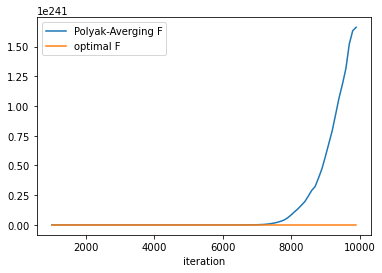

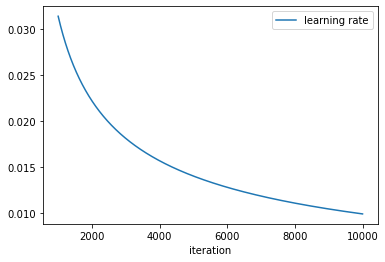

In [8]:
# have a look at the convergence
warmup_n = 1000
plot_every_n = 100
plt.plot(np.arange(warmup_n,n,plot_every_n), F_x_bar_history[warmup_n:n:plot_every_n])
plt.plot(np.arange(warmup_n,n,plot_every_n),F_true*np.ones(int((n-warmup_n) / plot_every_n)))
# plt.plot(np.arange(warmup_n,n,plot_every_n),F_x_history[warmup_n:n:plot_every_n])
plt.legend(['Polyak-Averging F','optimal F','SGD F'])
plt.xlabel(f'iteration')
plt.show()

plt.plot(np.arange(warmup_n,n),lr_history[warmup_n:n])
plt.legend(['learning rate'])
plt.xlabel(f'iteration')
plt.show()

In [126]:
# debug block
for r in range(R+1):
    print(x_bar_history[(r+1)*n-1])
print(x_star)


[-0.00383687  0.25228069  0.51193379  0.74665267  1.00157637]
[-0.01389249  0.2441871   0.51657713  0.72618437  1.01634781]
[0.00783805 0.24897414 0.50708456 0.7612618  1.0038858 ]
[-0.00850817  0.26628173  0.49587854  0.74526314  1.00240183]
[-0.02463519  0.23593106  0.50584419  0.73169873  1.00474388]
[-0.0058811   0.25619702  0.51201501  0.72528559  0.98838679]
[0.00837578 0.23129152 0.50828549 0.72375519 0.98562286]
[2.06405690e-04 2.46208167e-01 5.04825411e-01 7.51757185e-01
 9.96741401e-01]
[-0.01382153  0.24194297  0.50801359  0.74075877  0.9990105 ]
[-0.01001706  0.27682253  0.50603603  0.74737199  1.0191602 ]
[-0.02477081  0.25282595  0.51728162  0.75011079  0.9792745 ]
[0.   0.25 0.5  0.75 1.  ]


In [127]:
# debug block
print(np.array(bootstrap_output_history)[:,2])

[0.51657713 0.50708456 0.49587854 0.50584419 0.51201501 0.50828549
 0.50482541 0.50801359 0.50603603 0.51728162]


# Check Convergence

In [ ]:
# Generate data here

# set random seed
rng = np.random.default_rng(1)

# basic setting
var_epsilon = 1 # variance for noise in linear regression
d = 5 # d = 5,20,100,200
n = int(1e5) # sample size
eta = 1e-2
alpha = 0.501 # step size eta_i = eta * i^{-alpha}
x_star = np.linspace(0,1,d) # optimal solution
x_0 = np.zeros(d) # initial guess

# mean and variance for generating a_i
# identity covariance matrix case
#
# linear regression model:
# b_i = x_star^\top a_i + \epsilon_i
mean_a = np.zeros(d)
cov_a = np.eye(d)
Asy_cov = np.eye(d) # asymptotic covariance matrix


# run sgd
#
# update rule:
#   a_n: normal distribution (mean_a, cov_a)
#   epsilon_n: normal distribution (0,sigma_epsilon)
#   b_n = a_n^T x_star + epilon_n (assume it is generated instead of computing from a_n and x_star)
#   x_n = x_{n-1} - \eta_n a_n (a_n^T x_{n-1} - b_n)

x_prev = x_0
x_history = []
x_bar_history = []
a_n_history = []
b_n_history = []
F_true = var_epsilon
F_x_history = []
F_x_bar_history = []
lr_history = []

for iter_num in range(n):
    # sample data
    a_n = rng.multivariate_normal(mean_a, cov_a)
    epsilon_n = rng.normal(0, var_epsilon)
    b_n = a_n @ x_star + epsilon_n
    # update learning rate
    eta_n = eta * (1+iter_num)**(-alpha)
    # update rule
    x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
    x_prev = x_n
    # recording
    x_history.append(x_n)
    x_bar_history.append(np.mean(x_history, axis=0))
    a_n_history.append(a_n)
    b_n_history.append(b_n)
    F_x_history.append(F_LR(x_n, cov_a, x_star, var_epsilon))
    F_x_bar_history.append(F_LR(x_bar_history[iter_num], cov_a, x_star, var_epsilon))
    lr_history.append(eta_n)
    # output every 1000 iter
    if iter_num%1000==999:
        print(f'Iter \t[{iter_num+1}/{n}]\t\t finished')
    # debug code
x_out = x_bar_history[-1]

# have a look at the convergence
warmup_n = 1000
plot_every_n = 1000
plt.plot(np.arange(warmup_n,n,plot_every_n), F_x_bar_history[warmup_n:n:plot_every_n])
plt.plot(np.arange(warmup_n,n,plot_every_n),F_true*np.ones(int((n-warmup_n) / plot_every_n)))
# plt.plot(np.arange(warmup_n,n,plot_every_n),F_x_history[warmup_n:n:plot_every_n])
plt.legend(['Polyak-Averging F','optimal F','SGD F'])
plt.xlabel(f'iteration')
plt.show()

plt.plot(np.arange(warmup_n,n),lr_history[warmup_n:n])
plt.legend(['learning rate'])
plt.xlabel(f'iteration')
plt.show()

Iter 	[1000/100000]		 finished
Iter 	[2000/100000]		 finished
Iter 	[3000/100000]		 finished
Iter 	[4000/100000]		 finished
Iter 	[5000/100000]		 finished
Iter 	[6000/100000]		 finished
Iter 	[7000/100000]		 finished
Iter 	[8000/100000]		 finished
Iter 	[9000/100000]		 finished
Iter 	[10000/100000]		 finished
Iter 	[11000/100000]		 finished
Iter 	[12000/100000]		 finished
Iter 	[13000/100000]		 finished
Iter 	[14000/100000]		 finished
Iter 	[15000/100000]		 finished
Iter 	[16000/100000]		 finished
Iter 	[17000/100000]		 finished
Iter 	[18000/100000]		 finished
Iter 	[19000/100000]		 finished
Iter 	[20000/100000]		 finished
Iter 	[21000/100000]		 finished
Iter 	[22000/100000]		 finished
Iter 	[23000/100000]		 finished
Iter 	[24000/100000]		 finished
Iter 	[25000/100000]		 finished
Iter 	[26000/100000]		 finished
Iter 	[27000/100000]		 finished
Iter 	[28000/100000]		 finished
Iter 	[29000/100000]		 finished
Iter 	[30000/100000]		 finished
Iter 	[31000/100000]		 finished
Iter 	[32000/1000

# CI
Let $R$ be the number of Bootstrap replications, and $X_r$ denote the $r$-th Bootstrap output, which is a realization of random variable $\psi_n(\tilde{P}_n)$.

$
\bar{X} = \frac{1}{R} \sum_{r=1}^{r} X_r,\quad s^2 = \frac{1}{R-1}\sum_{r=1}^R (X_r - \bar{X})^2
$

And the confidence interval is

$
[\bar{X} - t_{R-1, \frac{\alpha}{2}}\frac{s}{\sqrt{R}}, \bar{X} + t_{R-1, \frac{\alpha}{2}}\frac{s}{\sqrt{R}}]
$

# Check Normality
We read check_norm_data_d_1_n_100000_eta_0.01.npy

(500, 200)


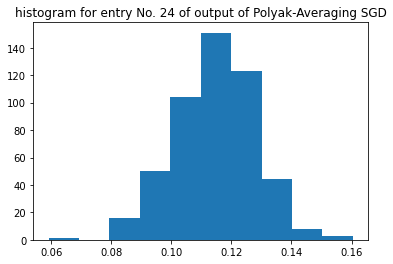

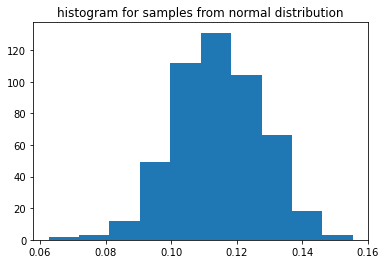

In [27]:
import numpy as np
import matplotlib.pyplot as plt


ii = 24

all_data = np.load('check_norm_data_d_200_n_100000_eta_0.01.npy')
data = all_data[:, ii:ii+1]
rng = np.random.default_rng(0)
normal_data = rng.normal(np.mean(data), np.std(data), np.shape(data))

print(np.shape(all_data))

plt.hist(data)
plt.title(f'histogram for entry No. {ii} of output of Polyak-Averaging SGD')
plt.show()

plt.hist(normal_data)
plt.title('histogram for samples from normal distribution')
plt.show()

# Xi's work
## Pros and cons of Batch mean and plug-in estimator
1. plug-in estimator converges faster
2. plug-in estimator requires **Hessian** and **inverse of Hessian** of loss function
3. plug-in estimator requires **Lipschitz condition over the hessian matrix of loss function**



In [8]:
# Draft
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2]])
print(A)
print(b)
b@A

[[1 2 3]
 [4 5 6]]
[[1 2]]


array([[ 9, 12, 15]])

# Some draft

The explicit form of $\Delta_n\triangleq X_n - 0$ in our special case:

$\Delta_n = \prod_{k=1}^n (1-\eta_k) \Delta_0 + \sum_{m=1}^n \prod_{k=m+1}^n (1-\eta_k)\eta_m \epsilon_m$ 

And in our case, $Z_1$ in the scratch paper is identical to $\sqrt{n} \bar\Delta_n$

# Sensitivity code and figure

Text(0.5, 1.0, 'Coverage rate')

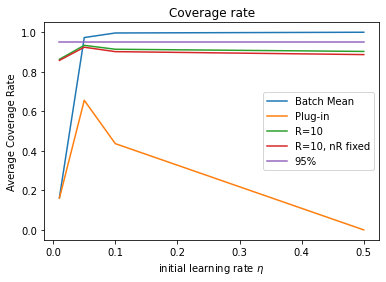

In [12]:
# Consider equi, d=100
import matplotlib.pyplot as plt
BM_cov = [1, 0.9963, 0.97314, 0.16368]
BM_len = [2.27133838551193e+23, 0.32880401461594766, 0.04947919626608937, 0.03966975420220587]
PI_cov = [0, 0.4364, 0.65564, 0.16018 ]
PI_len = [0.013798798963212268, 0.013798798963212268, 0.013798798963212268, 0.013798798963212268]
R10_cov = [0.90296, 0.91396, 0.93376, 0.86306]
R10_len = [4.730445947656601e+24, 0.24351689580545574, 0.04372577205392718, 0.104211945328596]
R10e_cov = [0.88692 , 0.90186, 0.92424, 0.85752]
R10e_len = [3.487276755842359e+25, 2.412823615969312, 0.4073441253347009, 0.4987865259391667]

eta = [0.5,0.1,0.05,0.01]

plt.plot(eta, BM_cov)
plt.plot(eta, PI_cov)
plt.plot(eta, R10_cov)
plt.plot(eta, R10e_cov)
plt.plot(eta, [0.95]*len(eta))
plt.legend(['Batch Mean', 'Plug-in', 'R=10', 'R=10, nR fixed', '95%'])
plt.xlabel('initial learning rate $\eta$')
plt.ylabel('Average Coverage Rate')
plt.title('Coverage rate')

In [6]:
import numpy as np

plugin_list = ['ori', 'BM', 'PI', 'fair']

Cov_prob = np.zeros([4,8])
Len  = np.zeros([4,8])
for ii in range(len(plugin_list)):
    pl = plugin_list[ii]
    filename = 'Result_'+pl+'_200_identity.txt'
    f = open(filename,'r')
    cnt = 0
    for line in f:
        if 'Cov' in line:
            tmp = line.split()
#             print(line)
#             print(tmp[2], tmp[6])
            Cov_prob[ii, cnt] = tmp[2]
            Len[ii,cnt] = tmp[6]
            cnt = cnt + 1
#             import pdb; pdb.set_trace()
    f.close() 

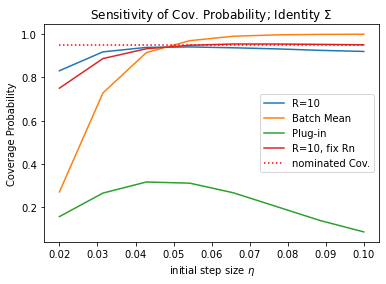

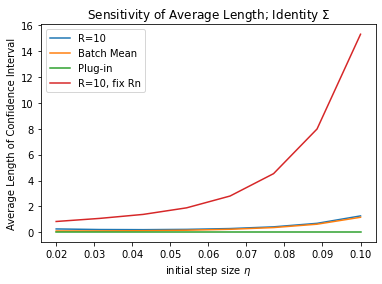

In [28]:
import matplotlib.pyplot as plt

eta = np.linspace(0.02,0.1,8)
plt.plot(eta, Cov_prob[0,:])
plt.plot(eta, Cov_prob[1,:])
plt.plot(eta, Cov_prob[2,:])
plt.plot(eta, Cov_prob[3,:])
plt.plot(eta, [0.95]*8, 'r:')
plt.legend(['R=10','Batch Mean', 'Plug-in', 'R=10, fix Rn', 'nominated Cov.'])
plt.xlabel('initial step size $\eta$')
plt.ylabel('Coverage Probability')
plt.title('Sensitivity of Cov. Probability; Identity $\Sigma$')
plt.savefig('identity_Cov.png',dpi=1000)
plt.show()
# Len
eta = np.linspace(0.02,0.1,8)
plt.plot(eta, Len[0,:])
plt.plot(eta, Len[1,:])
plt.plot(eta, Len[2,:])
plt.plot(eta, Len[3,:])
plt.legend(['R=10','Batch Mean', 'Plug-in', 'R=10, fix Rn'])
plt.xlabel('initial step size $\eta$')
plt.ylabel('Average Length of Confidence Interval')
plt.title('Sensitivity of Average Length; Identity $\Sigma$')
plt.savefig('identity_len.png', dpi=1000)
plt.show()

In [ ]:
import numpy as np

plugin_list = ['ori', 'BM', 'PI', 'fair']

Cov_prob = np.zeros([4,8])
Len  = np.zeros([4,8])
for ii in range(len(plugin_list)):
    pl = plugin_list[ii]
    filename = 'Result_'+pl+'_200_toeplitz.txt'
    f = open(filename,'r')
    cnt = 0
    for line in f:
        if 'Cov' in line:
            tmp = line.split()
#             print(line)
#             print(tmp[2], tmp[6])
            Cov_prob[ii, cnt] = tmp[2]
            Len[ii,cnt] = tmp[6]
            cnt = cnt + 1
#             import pdb; pdb.set_trace()
    f.close() 
    
import matplotlib.pyplot as plt

eta = np.linspace(0.02,0.1,8)
plt.plot(eta, Cov_prob[0,:])
plt.plot(eta, Cov_prob[1,:])
plt.plot(eta, Cov_prob[2,:])
plt.plot(eta, Cov_prob[3,:])
plt.plot(eta, [0.95]*8, 'r:')
plt.legend(['R=10','Batch Mean', 'Plug-in', 'R=10, fix Rn', 'nominated Cov.'])
plt.xlabel('initial step size $\eta$')
plt.ylabel('Coverage Probability')
plt.title('Sensitivity of Cov. Probability; Toeplitz $\Sigma$')
plt.savefig('Toeplitz_Cov.png',dpi=1000)
plt.show()
# Len
eta = np.linspace(0.02,0.1,8)
plt.plot(eta, Len[0,:])
plt.plot(eta, Len[1,:])
plt.plot(eta, Len[2,:])
plt.plot(eta, Len[3,:])
plt.legend(['R=10','Batch Mean', 'Plug-in', 'R=10, fix Rn'])
plt.xlabel('initial step size $\eta$')
plt.ylabel('Average Length of Confidence Interval')
plt.title('Sensitivity of Average Length; Toeplitz $\Sigma$')
plt.savefig('Toeplitz_len.png', dpi=1000)
plt.show()

In [ ]:
import numpy as np

plugin_list = ['ori', 'BM', 'PI', 'fair']

Cov_prob = np.zeros([4,8])
Len  = np.zeros([4,8])
for ii in range(len(plugin_list)):
    pl = plugin_list[ii]
    filename = 'Result_'+pl+'_200_equi.txt'
    f = open(filename,'r')
    cnt = 0
    for line in f:
        if 'Cov' in line:
            tmp = line.split()
#             print(line)
#             print(tmp[2], tmp[6])
            Cov_prob[ii, cnt] = tmp[2]
            Len[ii,cnt] = tmp[6]
            cnt = cnt + 1
#             import pdb; pdb.set_trace()
    f.close() 
    
import matplotlib.pyplot as plt

eta = np.linspace(0.02,0.1,8)
plt.plot(eta, Cov_prob[0,:])
plt.plot(eta, Cov_prob[1,:])
plt.plot(eta, Cov_prob[2,:])
plt.plot(eta, Cov_prob[3,:])
plt.plot(eta, [0.95]*8, 'r:')
plt.legend(['R=10','Batch Mean', 'Plug-in', 'R=10, fix Rn', 'nominated Cov.'])
plt.xlabel('initial step size $\eta$')
plt.ylabel('Coverage Probability')
plt.title('Sensitivity of Cov. Probability; equicorrelation $\Sigma$')
plt.savefig('Toeplitz_Cov.png',dpi=1000)
plt.show()
# Len
eta = np.linspace(0.02,0.1,8)
plt.plot(eta, Len[0,:])
plt.plot(eta, Len[1,:])
plt.plot(eta, Len[2,:])
plt.plot(eta, Len[3,:])
plt.legend(['R=10','Batch Mean', 'Plug-in', 'R=10, fix Rn'])
plt.xlabel('initial step size $\eta$')
plt.ylabel('Average Length of Confidence Interval')
plt.title('Sensitivity of Average Length; Toeplitz $\Sigma$')
plt.savefig('Toeplitz_len.png', dpi=1000)
plt.show()